In [1]:
# Import required libraries

import pandas as pd
import numpy as np
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.ticker as mticker

import calendar
from parser import ParserError
import matplotlib.dates as mdates
from sklearn import preprocessing
import math


In [2]:
#Importing CSV 
url = 'https://raw.githubusercontent.com/Chanidul/SI-Project/main/finalresponse.csv'
df  = pd.read_csv(url, error_bad_lines=False)
df = df.rename(columns={"Email Address":"email","On a scale of 1 to 10(low to high), how would you rate your knowledge of all the banking services available ?":"knowledge","Mention your Gender":"Gender","What is your age group":"agegroup","What type of a bank account do you have?":"acctype","Mention your hometown":"hometown","What is the industry are you employed/self employed":"industry","What  is your current level of education?":"Education","Do you use your cell phone for any financial/ banking transactions?":"usage","What type of Mobile phone do you use":"mobiletype","What type of Mobile Money transaction do you currently make?":"tr-type","How convenient is the mobile money transferring compared to ordinary banking?":"Convenience","How often do you make mobile transaction?":"frequency","Where do you typically (most often) withdraw money?":"withdrawal","Where did you hear about Mobile Money services?":"infomationsorce","On a scale of 1 to 5 (low to high), how would you rate your knowledge of all the banking services available ?":"knowledge","Who provides you Mobile banking/Financial service?":"serviceprovider","Is your mobile banking service an addition to existing bank account or separate service?":"formofmobilebanking","How convenient is the mobile money transferring compared to ordinary banking? ":"convenenience"," Where did you hear about Mobile Money services?":"sourceofinfo"," Do you use your cell phone for any financial/ banking transactions?":"mobileusage"," On a scale of 1 to 5, 1 being the lowest and 5 being the highest, how would you rate your ability to use the following devices? [Mobile Phone]":"mobilephone"," On a scale of 1 to 5, 1 being the lowest and 5 being the highest, how would you rate your ability to use the following devices? [ATM machine]":"atm"," On a scale of 1 to 5, 1 being the lowest and 5 being the highest, how would you rate your ability to use the following devices? [Internet]":"internet"," On a scale of 1 to 5, 1 being the lowest and 5 being the highest, how would you rate your ability to use the following devices? [POS]":"pos"})

df.drop(columns={'Timestamp','Username','Mobile Number','email','Birth day'})
df.head(3)


,Timestamp,Username,Mobile Number,email,Birth day,Gender,agegroup,hometown,industry,Education,...,tr-type,convenenience,frequency,withdrawal,sourceofinfo,knowledge,mobilephone,atm,internet,pos
0,2020/11/29 11:44:46 AM GMT+5:30,cmandawala@yahoo.com,702758536,NaN,2020-11-29,Male,25-35,Piliyandala,manufacturing,Degree,...,Online shopping,4.0,Monthly-once,ATM,Bank directly,7.0,High,Medium,High,Medium
1,2020/11/29 12:29:28 PM GMT+5:30,dilandamendra@gmail.com,9477355542,NaN,2020-11-29,Male,35-45,Kotte,manufacturing,Degree,...,Payments,4.0,Daily –Several times,At the bank teller,"Mass media (television, radio, newspaper)",7.0,Medium,Medium,Medium,Medium
2,2020/11/29 12:47:05 PM GMT+5:30,NaN,713404750,Chamithmdsn@gmail.com,1992-10-22,Male,25-35,Ratnapura,manufacturing,Degree,...,Utility payments,2.0,Daily –Several times,ATM,"Mass media (television, radio, newspaper)",4.0,High,High,High,NaN


In [3]:
#selecting significant attributes
useful_columns = ["Gender","agegroup","hometown","industry","Education","mobiletype","mobileusage","acctype","serviceprovider", "formofmobilebanking","tr-type","convenenience","frequency","withdrawal","sourceofinfo","knowledge","mobilephone","atm","internet","pos"]
df_use = df[useful_columns]
df_use.head(5)





,Gender,agegroup,hometown,industry,Education,mobiletype,mobileusage,acctype,serviceprovider,formofmobilebanking,tr-type,convenenience,frequency,withdrawal,sourceofinfo,knowledge,mobilephone,atm,internet,pos
0,Male,25-35,Piliyandala,manufacturing,Degree,Smart Phone,Yes,Savings Account,A bank,Yes,Online shopping,4.0,Monthly-once,ATM,Bank directly,7.0,High,Medium,High,Medium
1,Male,35-45,Kotte,manufacturing,Degree,Smart Phone,Yes,Savings Account;Current Account,A bank,No,Payments,4.0,Daily –Several times,At the bank teller,"Mass media (television, radio, newspaper)",7.0,Medium,Medium,Medium,Medium
2,Male,25-35,Ratnapura,manufacturing,Degree,Smart Phone,Yes,Savings Account,A bank,Yes,Utility payments,2.0,Daily –Several times,ATM,"Mass media (television, radio, newspaper)",4.0,High,High,High,NaN
3,Male,25-35,Baduraliya,manufacturing,Degree,Smart Phone,Yes,Savings Account,A bank,Yes,Loan payments,4.0,Monthly-several times,ATM,Friends or Family,5.0,High,High,High,NaN
4,Female,15-25,Homagama,manufacturing,Degree,Smart Phone,Yes,Savings Account,Bank and a Mobile operator,Yes,NaN,5.0,Daily –Several times,ATM,Bank directly,7.0,High,High,High,High


In [4]:
#data cleasing
df_use.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               46 non-null     object 
 1   agegroup             46 non-null     object 
 2   hometown             46 non-null     object 
 3   industry             46 non-null     object 
 4   Education            46 non-null     object 
 5   mobiletype           46 non-null     object 
 6   mobileusage          46 non-null     object 
 7   acctype              46 non-null     object 
 8   serviceprovider      46 non-null     object 
 9   formofmobilebanking  42 non-null     object 
 10  tr-type              27 non-null     object 
 11  convenenience        44 non-null     float64
 12  frequency            43 non-null     object 
 13  withdrawal           45 non-null     object 
 14  sourceofinfo         42 non-null     object 
 15  knowledge            45 non-null     float

Male      31
Female    15
Name: Gender, dtype: int64


([<matplotlib.patches.Wedge at 0x7fca3eeda550>,
 [Text(-0.571542398601862, 0.9398613124288235, 'Male'),
  Text(0.5715424865980261, -0.9398612589171581, 'Female')],
 [Text(-0.3117503992373792, 0.5126516249611764, '67.4%'),
  Text(0.3117504472352869, -0.5126515957729952, '32.6%')])

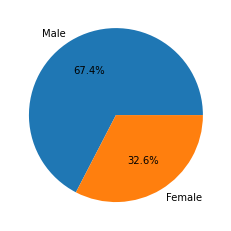

In [5]:
#Discriptive analysis based on Gender

Gen = pd.value_counts(df_use['Gender'])
print(Gen)
data_val=[]
for i in Gen:
    data_val.append(i)

label= df_use.Gender.unique()
plt.pie(x=data_val,labels = label,autopct ='%1.1f%%')   

Manufacturing        14
Education             8
IT Solutions          8
Construction          6
Banking & Finance     4
Retail                2
Consumer food         1
Engineering           1
Nursing               1
Housewife             1
Name: industry, dtype: int64


<BarContainer object of 10 artists>

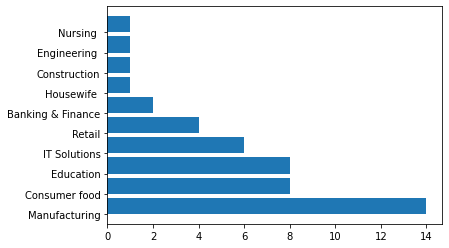

In [6]:
#Discriptive analysis based on Industry employed.

#data clensing & replaceing the duplicate entries
df_use = df_use.replace({'industry':{"IT":"IT Solutions","manufacturing":"Manufacturing","IT solutions":"IT Solutions",}})

Ind = pd.value_counts(df_use['industry'])
print(Ind)

data_val2=[]
for i in Ind:
    data_val2.append(i)

label2= df_use.industry.unique()

plt.barh(label2 ,data_val2 ,align='edge')




Degree     36
AL          6
Diploma     4
Name: Education, dtype: int64


([<matplotlib.patches.Wedge at 0x7fca3cd38580>,
 [Text(-0.8532824028195425, 0.6941967595995449, 'Degree'),
  Text(0.6343483067693764, -0.8986669158808648, 'Diploma'),
  Text(1.059209000679349, -0.2967765032475699, 'AL')],
 [Text(-0.4654267651742958, 0.37865277796338803, '78.3%'),
  Text(0.34600816732875067, -0.4901819541168353, '13.0%'),
  Text(0.5777503640069176, -0.16187809268049266, '8.7%')])

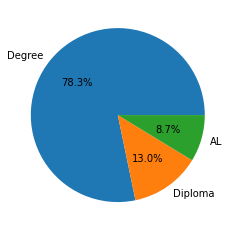

In [7]:
#Discriptive analysis based on Level of Education

Edu = pd.value_counts(df_use['Education'])
print(Edu)
data_val3=[]
for i in Edu:
    data_val3.append(i)

label3= df_use.Education.unique()
plt.pie(x=data_val3,labels = label3,autopct ='%1.1f%%')

Savings Account                                       34
Savings Account;Current Account                        6
Savings Account;Investment Account                     4
Savings Account;Current Account;Investment Account     2
Name: acctype, dtype: int64


([<matplotlib.patches.Wedge at 0x7fca3cd04dc0>,
 [Text(-0.7508084640855961, 0.8039195545932617, 'Savings Account'),
  Text(0.3683675860458568, -1.0364870098321293, 'Savings Account;Current Account'),
  Text(0.9398613525625671, -0.5715423326047355, 'Savings Account;Current Account;Investment Account'),
  Text(1.0897545437648157, -0.14978329127088505, 'Savings Account;Investment Account')],
 [Text(-0.4095318895012342, 0.4385015752326881, '73.9%'),
  Text(0.20092777420683094, -0.565356550817525, '13.0%'),
  Text(0.5126516468523092, -0.3117503632389466, '8.7%'),
  Text(0.594411569326263, -0.08169997705684638, '4.3%')])

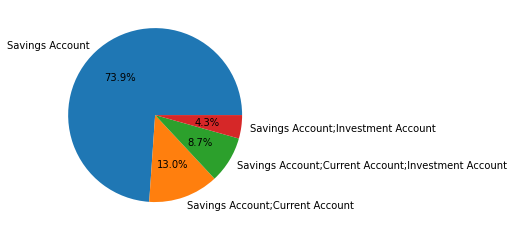

In [8]:
#Discriptive analysis based on Type of Account Using

Acc = pd.value_counts(df_use['acctype'])
print(Acc)
data_val4=[]
for i in Acc:
    data_val4.append(i)

label4 = df_use.acctype.unique()
plt.pie(x=data_val4,labels = label4,autopct ='%1.1f%%') 

Using for Banking        39
Not using for banking     5
May be using              2
Name: mobileusage, dtype: int64


([<matplotlib.patches.Wedge at 0x7fca3ccdc0d0>,
 [Text(-0.9766737031611723, 0.5060716130681927, 'Using for Banking'),
  Text(0.898666782248901, -0.6343484960827185, 'Not using for banking'),
  Text(1.089754515717349, -0.14978349533125015, 'May be using')],
 [Text(-0.5327311108151849, 0.2760390616735596, '84.8%'),
  Text(0.49018188122667317, -0.34600827059057365, '10.9%'),
  Text(0.5944115540276448, -0.08170008836250008, '4.3%')])

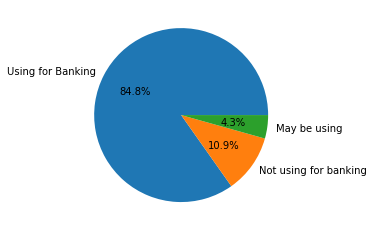

In [9]:
#Discriptive analysis based on usage of mobile phones for banking activites

df_use = df_use.replace({'mobileusage':{"Yes":"Using for Banking","No":"Not using for banking","Maybe":"May be using",}})
Muse = pd.value_counts(df_use['mobileusage'])
print(Muse)
data_val5=[]
for i in Muse:
    data_val5.append(i)

label5 = df_use.mobileusage.unique()
plt.pie(x=data_val5,labels = label5,autopct ='%1.1f%%') 



Mon Sev                  22
Weekly-Once               7
Monthly-once              4
Daily-once                4
Daily Sev                 3
No Answer                 3
Once daily& Weekly        2
Weekly Once Month Sev     1
Name: frequency, dtype: int64


<BarContainer object of 8 artists>

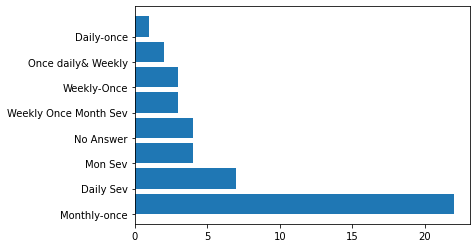

In [10]:
#Discriptive analysis based on frequency of usage

df_use = df_use.replace({'frequency':{"Weekly-Once;Monthly-several times":"Weekly Once Month Sev","Daily –Several times":"Daily Sev","Monthly-several times":"Mon Sev","Daily –Several times ":"Daily Sev","Daily-once;Weekly-Once":"Once daily& Weekly",}})
df_use['frequency'] = df_use['frequency'].fillna("No Answer")


Freq = pd.value_counts(df_use['frequency'])
print(Freq)

data_val6=[]

for i in Freq:
    data_val6.append(i)
label6 = df_use.frequency.unique()

plt.barh(label6 ,data_val6 ,align='edge')


Exceptional          27
Above Expected       12
Expected              3
Below Expectation     2
No Answer             2
Name: convenenience, dtype: int64


<BarContainer object of 5 artists>

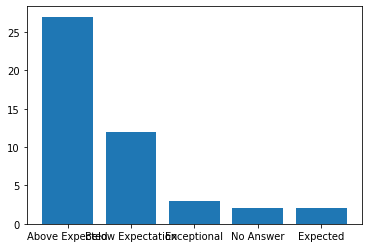

In [11]:
#Discriptive analysis based on user satisfaction

df_use = df_use.replace({'convenenience':
                         { 2.0:"Below Expectation",3.0:"Expected",4.0:"Above Expected",5.0:"Exceptional"}})

df_use['convenenience'] = df_use['convenenience'].fillna("No Answer")

Con = pd.value_counts(df_use['convenenience'])
print(Con)

data_val7=[]

for i in Con:
    data_val7.append(i)
    
label7 = df_use.convenenience.unique()

plt.bar(x= label7 ,height = data_val7 ,width = 0.8, align='center')
    



A bank                        41
Don’t know / not sure          3
Bank and a Mobile operator     2
Name: serviceprovider, dtype: int64


([<matplotlib.patches.Wedge at 0x7fca3cb67c70>,
 [Text(-0.9766737031611723, 0.5060716130681927, 'A bank'),
  Text(0.898666782248901, -0.6343484960827185, 'Bank and a Mobile operator'),
  Text(1.089754515717349, -0.14978349533125015, 'Don’t know / not sure')],
 [Text(-0.5327311108151849, 0.2760390616735596, '84.8%'),
  Text(0.49018188122667317, -0.34600827059057365, '10.9%'),
  Text(0.5944115540276448, -0.08170008836250008, '4.3%')])

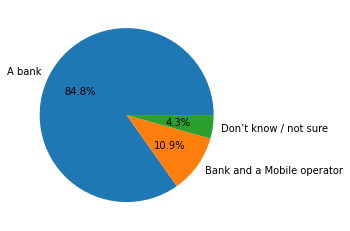

In [12]:
#Discriptive analysis based on Mobile Banking Provider


SP = pd.value_counts(df_use['serviceprovider'])
print(SP)
data_val8=[]
for i in Muse:
    data_val8.append(i)

label8 = df_use.serviceprovider.unique()

plt.pie(x=data_val8,labels = label8,autopct ='%1.1f%%') 

ATM          40
Bank          3
POS           2
No Answer     1
Name: withdrawal, dtype: int64


([<matplotlib.patches.Wedge at 0x7fca3ccb30d0>,
 [Text(-1.008932392408853, 0.43824128918684574, 'ATM'),
  Text(0.8986667674009027, -0.6343485171175323, 'Bank'),
  Text(1.0592089624732857, -0.29677663960673517, 'POS'),
  Text(1.0974356328361194, -0.07506684875220211, 'No Answer')],
 [Text(-0.550326759495738, 0.23904070319282492, '87.0%'),
  Text(0.49018187312776507, -0.34600828206410844, '6.5%'),
  Text(0.5777503431672466, -0.16187816705821917, '4.3%'),
  Text(0.5986012542742469, -0.04094555386483751, '2.2%')])

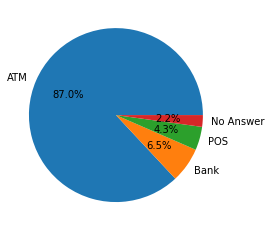

In [13]:
#Discriptive analysis based on Method of Money Withdrawal Method

df_use = df_use.replace({'withdrawal':{"At the bank teller":"Bank","Point of Sale":"POS"}})
df_use['withdrawal'] = df_use['withdrawal'].fillna("No Answer")


WD = pd.value_counts(df_use['withdrawal'])

print(WD)
data_val9=[]
for i in WD:
  data_val9.append(i)

label9 = df_use.withdrawal.unique()

plt.pie(x=data_val9,labels = label9,autopct ='%1.1f%%') 



Mass Media           17
Bank directly        16
Friends or Family     8
No Answer             4
Mobile Operator       1
Name: sourceofinfo, dtype: int64


([<matplotlib.patches.Wedge at 0x7fca3caf3460>,
 [Text(0.4382411947237756, 1.0089324334399594, 'Bank directly'),
  Text(-1.0592090076259044, -0.2967764784549932, 'Mass Media'),
  Text(0.36836763456731464, -1.036486992587597, 'Friends or Family'),
  Text(1.008932464213283, -0.43824112387647085, 'No Answer'),
  Text(1.0974356521638136, -0.07506656619151622, 'Mobile Operator')],
 [Text(0.23904065166751393, 0.5503267818763414, '37.0%'),
  Text(-0.5777503677959478, -0.161878079157269, '34.8%'),
  Text(0.2009278006730807, -0.5653565414114166, '17.4%'),
  Text(0.5503267986617907, -0.23904061302352952, '8.7%'),
  Text(0.5986012648166256, -0.040945399740827025, '2.2%')])

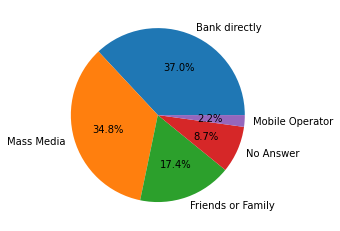

In [14]:
#Discriptive analysis based on How they know about Mobile banking


df_use = df_use.replace({'sourceofinfo':{"Mass media (television, radio, newspaper)":"Mass Media","SMS from Mobile Operator":"Mobile Operator"}})

df_use['sourceofinfo'] = df_use['sourceofinfo'].fillna("No Answer")


SI = pd.value_counts(df_use['sourceofinfo'])

print(SI)
data_val10=[]
for i in SI:
  data_val10.append(i)

label10 = df_use.sourceofinfo.unique()

plt.pie(x=data_val10,labels = label10,autopct ='%1.1f%%') 


8.0     10
7.0     10
5.0      8
9.0      7
3.0      4
10.0     2
6.0      2
4.0      2
0.0      1
Name: knowledge, dtype: int64
<class 'numpy.ndarray'> <class 'list'> 9 9


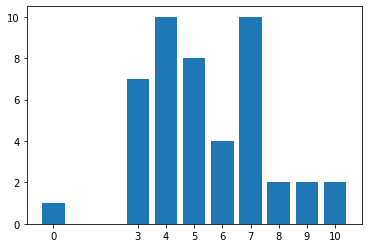

In [15]:
#Discriptive analysis based on knowledge

#df_use = df_use.replace({'knowledge':{ 3.0:"3",4.0:"4",5.0:"5",6.0:"6",8.0:"8",7.0:"7",9.0:"9",10.0:"10"}})

df_use['knowledge'] = df_use['knowledge'].fillna(0)

Knw = pd.value_counts(df_use['knowledge'])
print(Knw)

data_val11=[]

for i in Knw:
    data_val11.append(i)
    
label11 = df_use.knowledge.unique()


plt.bar(x= label11 ,height = data_val11 ,width = 0.8, align='center')
plt.xticks(label11)
print(type(label11),type(data_val11),len(label11),len(data_val11))


    

High         33
Medium       11
Low           1
No Answer     1
Name: atm, dtype: int64
High         32
Medium       12
No Answer     2
Name: internet, dtype: int64
Medium       19
High         14
No Answer     8
Low           5
Name: pos, dtype: int64


<BarContainer object of 4 artists>

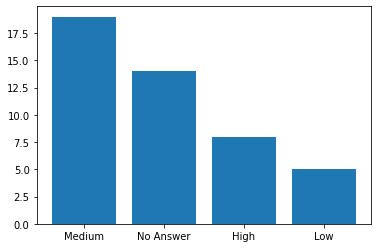

In [16]:
#Discriptive analysis based on knowledge on specific equipment

df_use = df_use.replace({'internet':{ "Medium;High":"No Answer"}})

df_use = df_use.replace({'pos':{"Medium;High":"No Answer"}})


df_use['atm'] = df_use['atm'].fillna("No Answer")
df_use['internet'] = df_use['internet'].fillna("No Answer")
df_use['pos'] = df_use['pos'].fillna("No Answer")


atm = pd.value_counts(df_use['atm'])
print(atm)

data_atm=[]

for i in atm:
    data_atm.append(i)
    
label_atm = df_use.atm.unique()

internet = pd.value_counts(df_use['internet'])
print(internet)

data_internet=[]

for i in internet:
    data_internet.append(i)
    
label_internet = df_use.internet.unique()


pos = pd.value_counts(df_use['pos'])
print(pos)

data_pos=[]

for i in pos:
    data_pos.append(i)
    
label_pos = df_use.pos.unique()

plt.bar(label_pos,data_pos)

<BarContainer object of 4 artists>

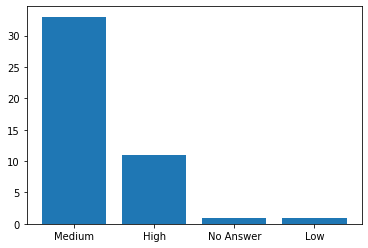

In [17]:
plt.bar(label_atm,data_atm)


<BarContainer object of 3 artists>

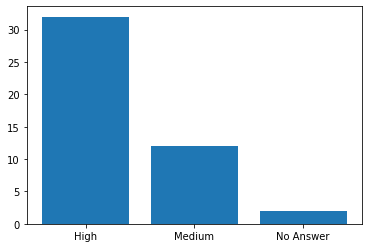

In [18]:
plt.bar(label_internet,data_internet)

In [19]:
#Hypothesis Testing 
import statsmodels.api as sn
from scipy import stats

In [20]:
df_use.head()
print("There are {} rows and {} columns".format(df_use.shape[0],df_use.shape[1]))


There are 46 rows and 20 columns


In [21]:
high_competant = (df_use['knowledge']) > 7
# print(high_competent)
df_use1 = df_use[high_competant]
#print(df_use1)
df_use2 = df_use[~df_use.index.isin(df_use1.index)]
#print(df_use1['knowledge'])
#count of high knowledge
hi =df_use1['knowledge'].count()
#count of low knowledge
lo =df_use2['knowledge'].count()
#total count
tot =df_use['knowledge'].count()
#proportion of high knowlege count in the sample
phi = hi/tot
print(hi,lo,phi)

19 27 0.41304347826086957


In [22]:
group2535 = (df_use['agegroup']) == '25-35'
#print(group2535)
df_use3 = df_use[group2535]
#print(df_use3)
df_use4 = df_use[~df_use.index.isin(df_use3.index)]
#print(df_use4)

#count of people in age group 25-35
group1 = df_use3['agegroup'].count()
#count of people not in 25-35 age group
group2 = df_use4['agegroup'].count()
#total count
tot1 =df_use['agegroup'].count()
#proportion of 25-35 from sample
age2535 = group1/tot1
print(group1,group2,age2535)

31 15 0.6739130434782609


In [24]:
from scipy import stats as st
#HYPHOTESIS TEST OF SURVEY DATA
#Check whether 25-35 group has the highest know-how on mobile banking 

SE = math.sqrt(((1-age2535)*age2535)/46)
Z = (phi-age2535)/SE

p_value = st.norm.sf(abs(Z))
print(p_value)

#Since nP0 >10 &    n(1-P0 ) > 10 P value is estimated in Z distribution


#P1	Proportion of sample between 25-35  that has above expected knowledge in mobile 	banking
#P2	Proportion of sample between doesn’t belong to 25-35  that has above average 	knowledge in mobile banking

#significance level is 0.05



8.023642753056863e-05


In [ ]:
#Since P value is << than significance level 0.05 null hypothesis can be rejected and can be determined that age group between 25-35 has highest know how on mobile banking
